In [48]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk
import sys
from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
dir = 'C:/Users/Rodrigo/dados/'
data = pd.read_csv(dir+'texto_History_Civics.txt', delimiter=',' )

In [30]:
STOP_WORDS = nltk.corpus.stopwords.words()

def clean_sentence(val):
    "remove chars that are not letters or numbers, downcase, then remove stop words"
    regex = re.compile('([^\s\w]|_)+')
    sentence = regex.sub('', val).lower()
    sentence = sentence.split(" ")
    
    for word in list(sentence):
        if word in STOP_WORDS:
            sentence.remove(word)  
            
    sentence = " ".join(sentence)
    return sentence

def clean_dataframe(data):
    "drop nans, then apply 'clean_sentence' function to question1 and 2"
    data = data.dropna(how="any")
    
    data['stem'] = data['stem'].apply(clean_sentence)
    
    return data

data = clean_dataframe(data)
data.head(5)


,Unnamed: 0,id,approved,group,stem
0,66,p141508,1,History_Civics,classroom fill three time day energet th grade...
1,165,p158118,0,History_Civics,teach suburban school mogador ohio approxim pe...
2,170,p115004,1,History_Civics,veri divers student bodi consist caucasian sou...
3,231,p127789,1,History_Civics,student work hard everyday love learn global h...
4,282,p220659,1,History_Civics,student special amaz becaus compass one anoth ...


In [32]:
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for col in ['stem']:
        for sentence in data[col].iteritems():
            word_list = sentence[1].split(" ")
            corpus.append(word_list)
            
    return corpus

corpus = build_corpus(data)        
corpus[0:1]

[['classroom',
  'fill',
  'three',
  'time',
  'day',
  'energet',
  'th',
  'grade',
  'peopl',
  'know',
  'world',
  'read',
  'rang',
  'level',
  'rd',
  'th',
  'grade',
  'need',
  'inspir',
  'stori',
  'read',
  'move',
  'age',
  'histori',
  'hand',
  'librari',
  'biographi',
  'huge',
  'help',
  'student',
  'multilingu',
  'usual',
  'ell',
  'varieti',
  'lexil',
  'level',
  'make',
  'read',
  'textbook',
  'challeng',
  'school',
  'librari',
  'well',
  'stock',
  'interest',
  'histor',
  'account',
  'student',
  'tri',
  'hard',
  'succeed',
  'show',
  'readi',
  'work',
  'day',
  'new',
  'select',
  'histori',
  'relat',
  'topic',
  'great',
  'attractionwith',
  'book',
  'ive',
  'select',
  'student',
  'engag',
  'week',
  'read',
  'assign',
  'choos',
  'book',
  'lexil',
  'level',
  'read',
  'take',
  'note',
  'final',
  'creat',
  'short',
  'book',
  'report',
  'powerpoint',
  'review',
  'share',
  'class',
  'sinc',
  'wide',
  'varieti',
  '

In [84]:
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=50, workers=4)
model.wv['histori']

array([ 0.4145818 , -2.298852  ,  0.92522997,  3.7575188 ,  0.05790357,
        0.950545  , -1.220177  , -0.21769536,  0.19490975,  0.9183111 ,
        1.1419917 ,  2.2872477 ,  2.6328862 ,  1.1552851 , -0.36550725,
       -2.1707196 ,  1.0191332 ,  0.84708804, -1.9094137 , -1.9483783 ,
       -1.383401  , -0.03187867,  0.6325413 ,  2.7047167 ,  0.4392825 ,
       -0.24346565,  0.68046296, -1.6668314 , -0.7735192 ,  0.6613752 ,
        1.8857832 , -1.0786909 ,  1.0724514 , -1.1997163 , -1.1578641 ,
       -0.5912773 ,  0.96352595, -0.86489123, -1.649659  ,  0.35865736,
        0.61573577,  0.45027503,  0.19815387, -2.276455  , -0.10858751,
        1.0947504 ,  3.4933944 , -2.4758575 ,  1.188461  ,  1.251348  ,
        0.68770957, -0.7764402 ,  3.6675234 , -0.18954985,  3.754045  ,
       -0.64103466,  0.75559604,  0.3345151 , -2.073447  , -0.99627644,
        0.5310599 ,  0.18708609, -2.5629063 ,  0.82712173,  2.9124434 ,
        1.3254844 , -2.0586503 , -1.3287154 , -0.16425589,  0.17

In [78]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

C:\Users\Rodrigo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


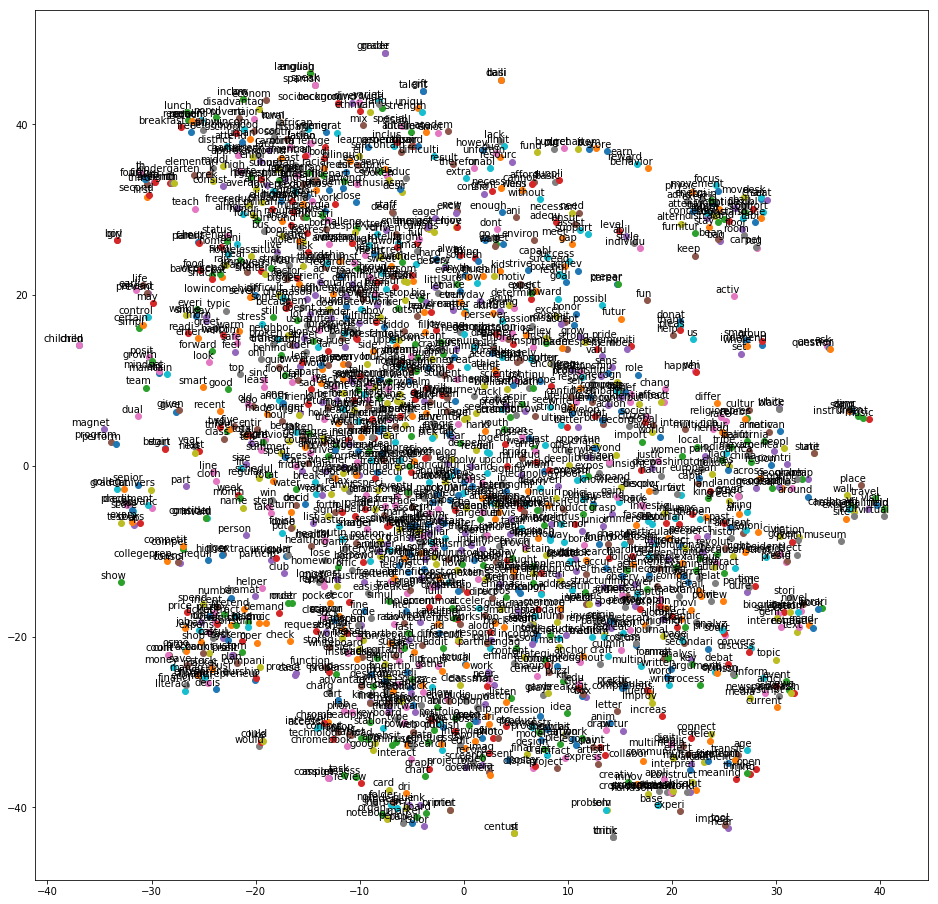

In [85]:
tsne_plot(model)

C:\Users\Rodrigo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


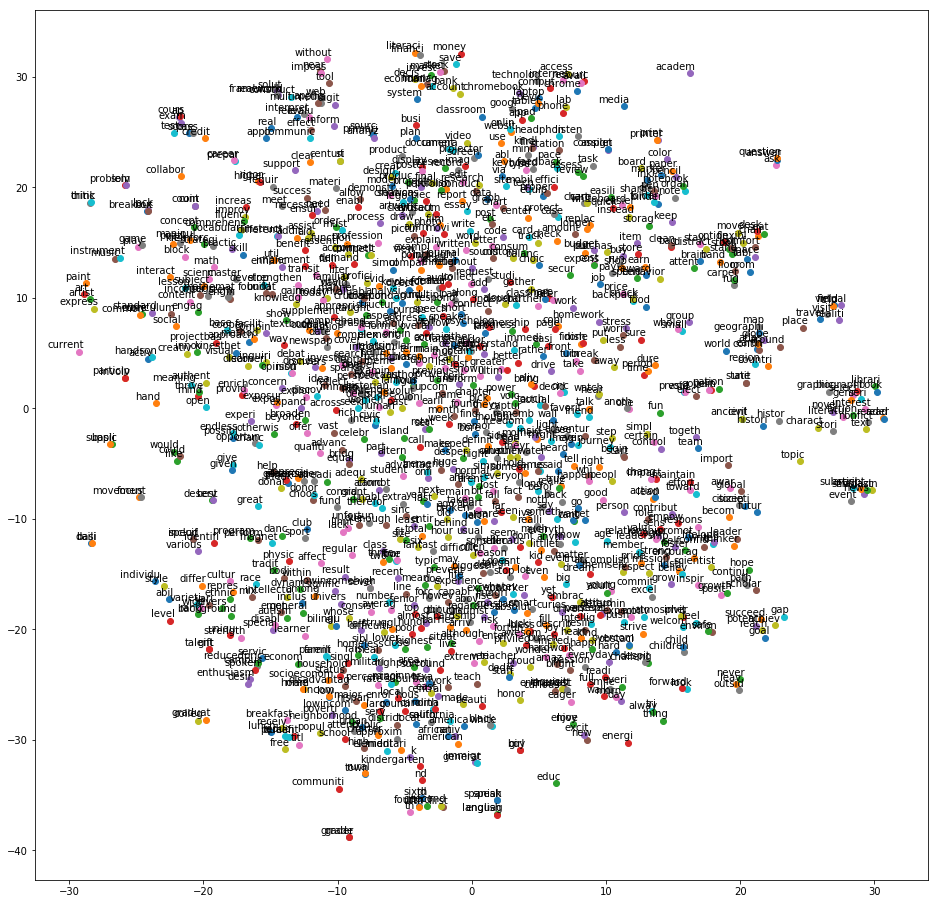

In [42]:
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=100, workers=4)
tsne_plot(model)

In [88]:
model.most_similar('comput')

C:\Users\Rodrigo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('lab', 0.8827837705612183),
 ('laptop', 0.8426730632781982),
 ('desktop', 0.7903327941894531),
 ('internet', 0.7680957317352295),
 ('phone', 0.7469652891159058),
 ('devic', 0.7379748225212097),
 ('tech', 0.7358570098876953),
 ('electron', 0.7178778648376465),
 ('technolog', 0.7176457643508911),
 ('keyboard', 0.7086772322654724)]

In [68]:
model.most_similar('translat')

C:\Users\Rodrigo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('speak', 0.7845489382743835),
 ('oral', 0.7345389127731323),
 ('speaker', 0.7231011986732483),
 ('languag', 0.6989380121231079),
 ('ell', 0.6755414605140686),
 ('english', 0.6632850170135498),
 ('spanish', 0.6621000170707703),
 ('dual', 0.6565792560577393),
 ('speech', 0.5973408818244934),
 ('spoken', 0.5895621180534363)]